<a href="https://colab.research.google.com/github/MrCogito/Spectrogram-Generator/blob/main/Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generate spectrogram**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import os
import librosa
import librosa.display
import IPython.display as ipd
import soundfile

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip /content/gdrive/MyDrive/Inzynierka/Data/clips.zip > /dev/null 


Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/Inzynierka/Data/clips.zip > /dev/null 

unzip:  cannot find or open /content/gdrive/MyDrive/Inzynierka/Data/clips.zip, /content/gdrive/MyDrive/Inzynierka/Data/clips.zip.zip or /content/gdrive/MyDrive/Inzynierka/Data/clips.zip.ZIP.


In [ ]:
audio_folder = '/content/clips/'
spectrogram_tensor_folder = '/content/gdrive/MyDrive/Inzynierka/Data/en_spectrogram_tensor/'

spectrogram_folder = '/content/gdrive/MyDrive/Inzynierka/Data/en_spectrogram/'
audio_trim_folder = '/content/gdrive/MyDrive/Inzynierka/Data/audio_trim_folder/'
spectrogram_tensor = np.empty((1,256,8))
#spectrogram_tensor = np.load('/content/gdrive/MyDrive/Inzynierka/Data/en_spectrogram_tensor/Dataset_mel_spectrogram_256_8_3.npy')

In [ ]:
#Create spectrograms 
target_size = 4000                          
target_samplig_rate=8000
for filename in os.listdir(audio_folder)[9:11]:
  if filename.endswith("mp3"):
    audio_file, sr = librosa.load(audio_folder + filename)                                                           # Load audio file
    audio_file_trim, index = librosa.effects.trim(audio_file, top_db = 15)                                           # Trim silnce with threshold equal to 15dB
    audio_file_trim_4k = librosa.resample(audio_file_trim, sr, target_sr = target_samplig_rate)                      # resample to 4k 
    audio_fix_length = librosa.util.fix_length(audio_file_trim_4k, target_size, axis=- 1)                            # get same length in all clips    
    #Spectrogram = librosa.stft(audio_fix_length, n_fft=510,)                                                        # create spectrogram.  n_fft size set to 510 to get 256 x n shape of spectrogram 
    Spectrogram = librosa.feature.melspectrogram(audio_fix_length, sr=target_samplig_rate,
                                                 n_fft=2048, hop_length=512, n_mels=256)
    S_DB = librosa.power_to_db(Spectrogram, ref=np.max)
    #S_db = librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max)                                                 # convert to dB-scaled spectrogram
    tensor_spectrogram = tf.convert_to_tensor(S_DB)                                                                  # conver to tensor
    tensor_spectrogram = tf.expand_dims(tensor_spectrogram, axis=0)    
    spectrogram_tensor = tf.concat([spectrogram_tensor,tensor_spectrogram], 0)
    print(spectrogram_tensor.shape)


np.save(spectrogram_tensor_folder + "Dataset_mel_spectrogram_256_8_4", spectrogram_tensor)


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(8, 256, 8)


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(9, 256, 8)


## LOAD AND CHECK GENERATED


In [ ]:
loaded = np.load('/content/drive/MyDrive/Inzynierka/Data/Results_mel/v1/v1_250.npy')
print(loaded.shape)
loaded = loaded.reshape(16,256,8)
loaded = (loaded *80)-80

print(loaded.shape)
print(loaded.dtype)

(16, 256, 8, 1)
(16, 256, 8)
float32


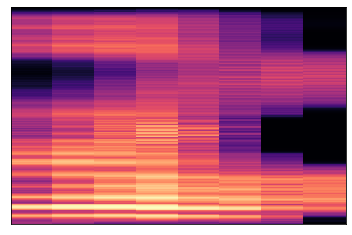

In [ ]:
#S_DB = librosa.power_to_db(S, ref=np.max)
spec_gen = loaded[0]
librosa.display.specshow(spec_gen)

(3584,)


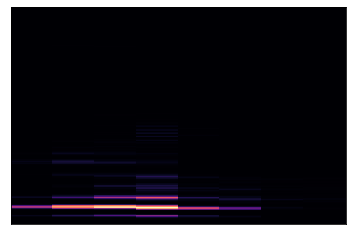

In [ ]:
#Mel Spectrogram to audio

P = librosa.db_to_power(spec_gen, ref=25)
librosa.display.specshow(P.reshape(256,8))
S = librosa.feature.inverse.mel_to_stft(P,sr=8000, n_fft=2048)
y = librosa.griffinlim(S)
print(y.shape)
ipd.Audio(y, rate=8000)

# LOAD AND CHECK REAL

In [ ]:
loaded_real = np.load('/content/drive/MyDrive/Inzynierka/Data/en_spectrogram_tensor/Dataset_mel_spectrogram_256_8_4.npy')

#loaded_real = np.load('/content/gdrive/MyDrive/Inzynierka/Data/Results_mel/v1/v1_250.npy')
print(loaded_real.shape)
print(loaded_real.dtype)

(40000, 256, 8)
float32


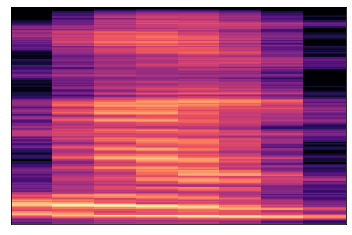

In [ ]:
spec = loaded_real[7]
librosa.display.specshow(spec)

(3584,)


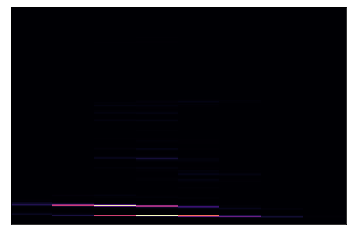

In [ ]:
#Mel Spectrogram to audio

P = librosa.db_to_power(spec, ref=1.0)
librosa.display.specshow(P.reshape(256,8))
S = librosa.feature.inverse.mel_to_stft(P,sr=8000, n_fft=2048)
y = librosa.griffinlim(S)
print(y.shape)
ipd.Audio(y, rate=8000)